In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from textblob import TextBlob

register_matplotlib_converters()

In [66]:
tweets = pd.read_csv('project-data/cleanedTweetsSentiment.csv')
tweets['created_at'] = pd.to_datetime(tweets['created_at'])  # converting created_at to datetime

In [67]:
i = 21
tweets.text[i]

' FoxNews is at it again So different from what they used to be during the Primaries amp before Proud Warriors Now new Fox Polls which have always been terrible to me they had me losing BIG to Crooked Hillary have me down to Sleepy Joe Even considering '

In [68]:
tweets[tweets.score_neg>0.1].iloc[0]['text']

'Are any Democrat operatives the DNC or Crooked Hillary Clinton blaming Russia Russia Russia for the Bernie Sanders win in Nevada If so I suggest calling Bob Mueller amp the Angry Democrats to do a new Mueller Report Democrat Edition Bob will get to the bottom of it '

In [69]:
tweets.created_at = tweets.created_at.apply(lambda x: pd.to_datetime(x))

In [70]:
tweets.created_at[0]

Timestamp('2020-04-26 21:21:02')

In [71]:
tweets['hour'] = tweets.created_at.apply(lambda x: x.hour)
tweets['minute'] = tweets.created_at.apply(lambda x: x.minute)
tweets['day'] = tweets.created_at.apply(lambda x: x.day)
tweets['week'] =  tweets.created_at.apply(lambda x: x.week)
tweets['month'] =  tweets.created_at.apply(lambda x: x.month)
tweets['year'] = tweets.created_at.apply(lambda x: x.year)

In [75]:
groupedTweets = tweets.groupby(['year','month']).mean()

In [76]:
groupedTweets['score_compound']

year  month
2017  3        0.361200
      4       -0.620100
      5        0.612400
      6       -0.434850
      7       -0.200933
      8        0.868900
      9        0.202350
      10       0.234600
      11       0.137667
      12       0.190040
2018  1       -0.440400
      2        0.332933
      3       -0.278775
      4        0.301460
      5        0.268050
      6       -0.680250
      7       -0.343575
      8       -0.288783
      9       -0.453100
      11      -0.475300
      12      -0.333350
2019  1       -0.168017
      2       -0.272333
      3       -0.399700
      4       -0.406771
      5       -0.056443
      6       -0.296075
      7        0.064056
      8       -0.156000
      9       -0.726900
      10       0.059288
      11       0.832600
      12      -0.817600
2020  1        0.476700
      2       -0.312375
      4        0.267700
Name: score_compound, dtype: float64

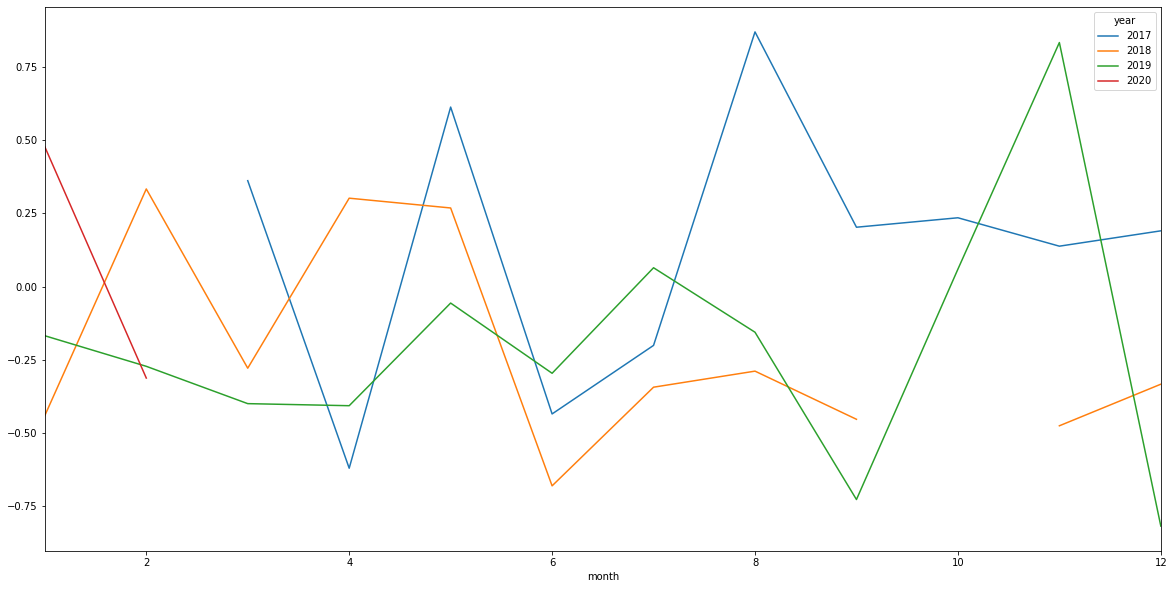

In [77]:
groupedTweets['score_compound'].unstack(level=0).plot(kind='line', figsize=(20,10))